<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/kc_house_data.csv')

# Exploratory Data Analysis

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


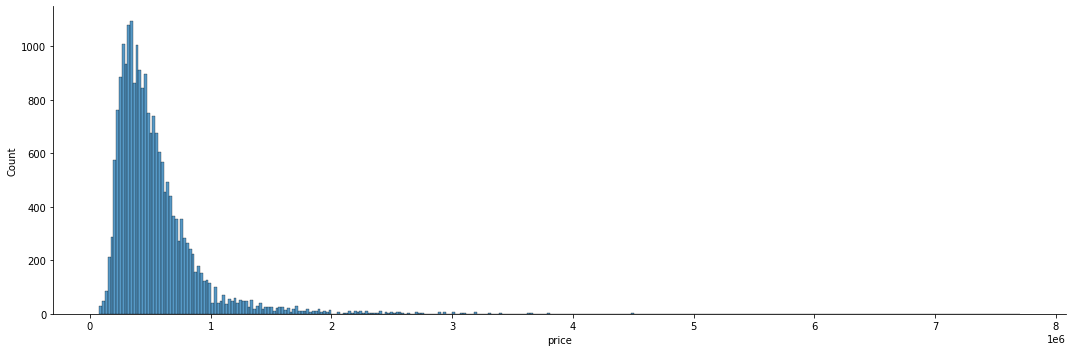

In [29]:
sns.displot(x='price', data=df, aspect=3);

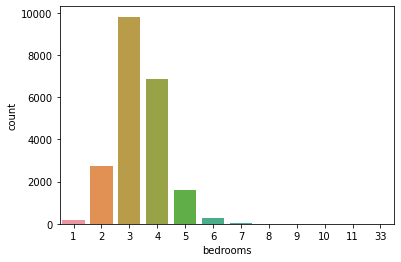

In [27]:
sns.countplot(x='bedrooms', data=df);

-------

### Correlation between features

In [30]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


If we sort the correlation with Price with other features, we can see `sqft_living` has the highest correlation with `price`.

In [32]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

So what we can do is trying to plot the correlation between the features using Scatter Plot.

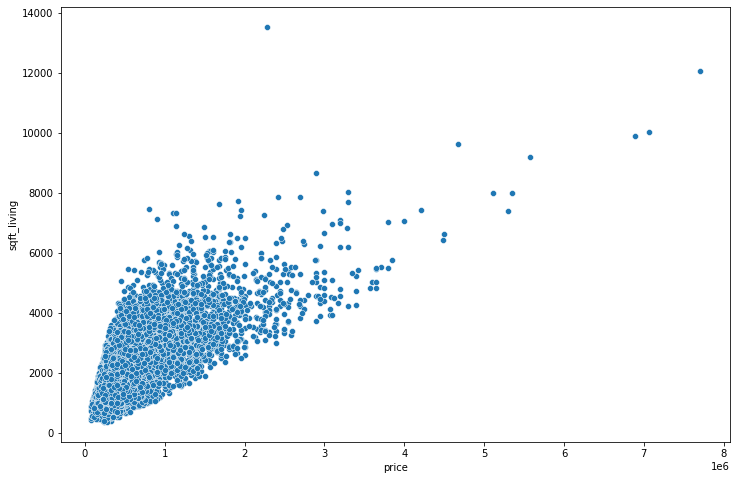

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='sqft_living', data=df);

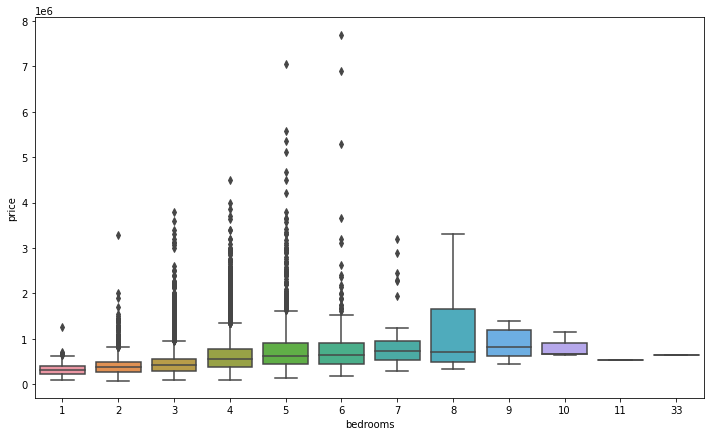

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='bedrooms', y='price', data=df);

---------

### Geographical Properties

In [40]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

As we have featuers like `lat` and `long`, we can visualize those features too.

We can see that there are some expensive ares around long 122.2 and lat 47.6 based on scatterplot.

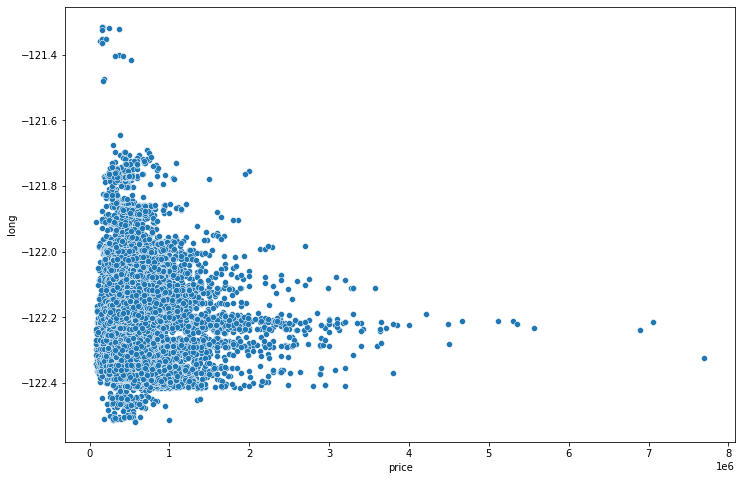

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df);

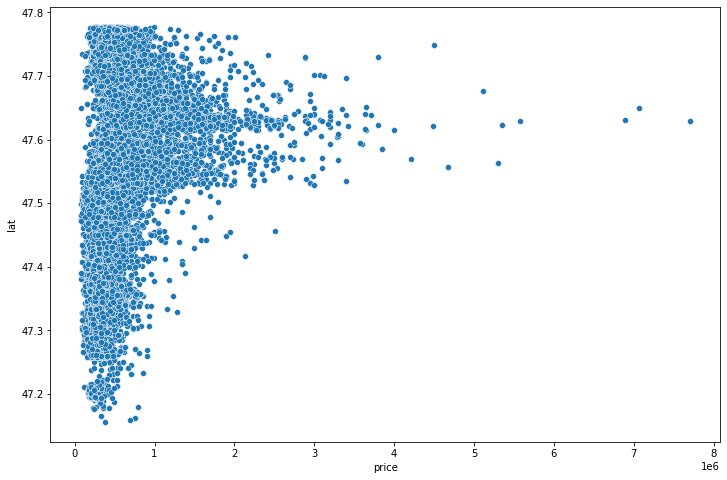

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df);

Now we want to hone in Expensive ares on this map.

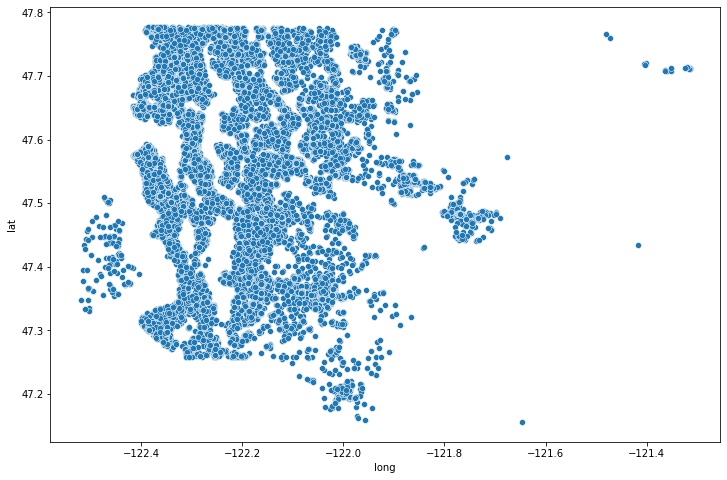

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df);

Now we gonna make heatmap based on `Price`

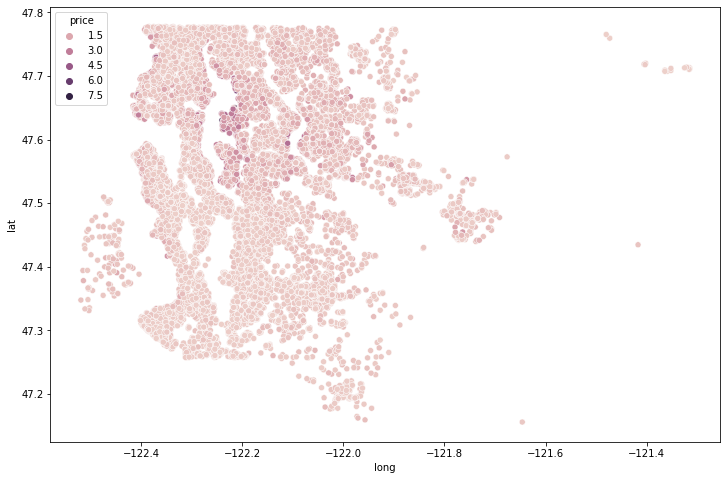

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price');

#### However our heatmap is not as clear as we expected. The reason is we have outliers data which price are much expensive. 

What we can do is exclude them from our dataset and re-try the plotting again.

In [49]:
df.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [52]:
df.sort_values('price', ascending=False)['price']

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

Let's check our dataframe length. So that we can calcluate how many are in TOP 1%.

There are about 216 houses on TOP 1%

In [50]:
len(df)

21597

In [51]:
len(df) * (0.01)

215.97

Now we gonna grab Bottom 99% to our new dataframe. Meaning Excluding those Top 1%, not to skew our data.

We gonna grab data Start from Index Location of 216 till the end. In this way, we have excluded 0 - 255 (Top 1% houses)

In [53]:
bottom_99_perc = df.sort_values('price', ascending=False).iloc[216: ]

If we plot this again, we can see much clear color distribution.

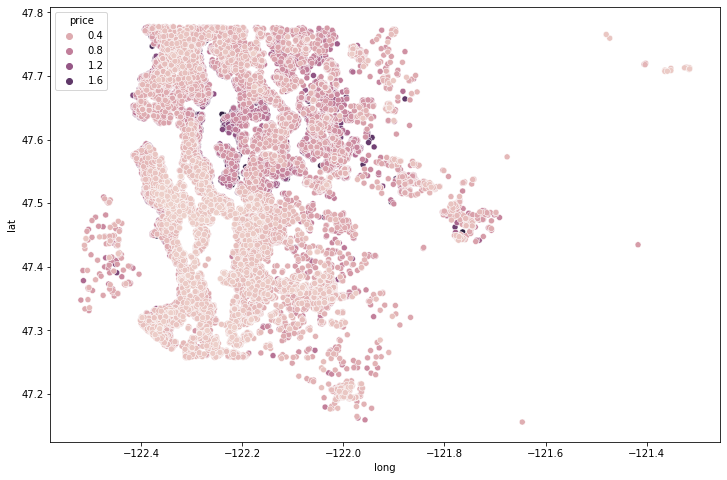

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=bottom_99_perc, hue='price');

If we customize a little bit more, we can see much clearer plot.

We can even see Green Areas where Expensive houses are sitting. And it makes sense because water front houes are much more expensive than in land houses.

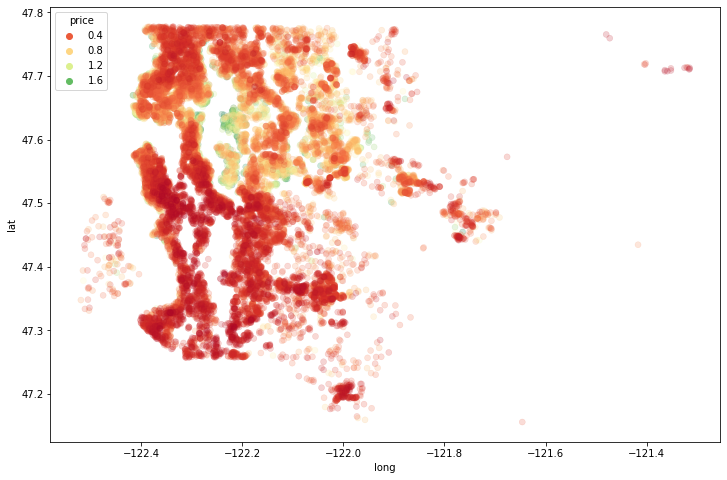

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=bottom_99_perc, hue='price',
                edgecolor=None, alpha=0.2,palette='RdYlGn');

### Other Features

And we can see Waterfront houes (1) are more expensive.

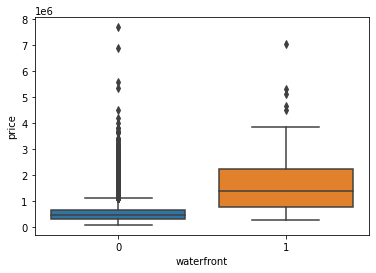

In [63]:
sns.boxplot(x='waterfront', y='price', data=df);

## Working with Feature Data

In [64]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


 As `id` is not required for us, we gonna drop it.

In [66]:
df = df.drop('id', axis=1)

In [69]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


### Feature Engineering from Date

In [68]:
# string to datetime object
df['date'][:2]

0    10/13/2014
1     12/9/2014
Name: date, dtype: object

In [70]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
df['date'][:2]

0   2014-10-13
1   2014-12-09
Name: date, dtype: datetime64[ns]

Now we can see that format of `date` is changed, as it becomes datetime object

#### using Lambda
same as below function

In [73]:
def get_year(date):
    return date.year

In [77]:
get_year(df['date'].iloc[0])

2014

In [80]:
# using lambda to extract info
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [81]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10


Let's explore whether `Month` feature has any impacts on `Price`. Example: In December, house prices are much expensive than in March. So We can raise prices in Holidays, etc.

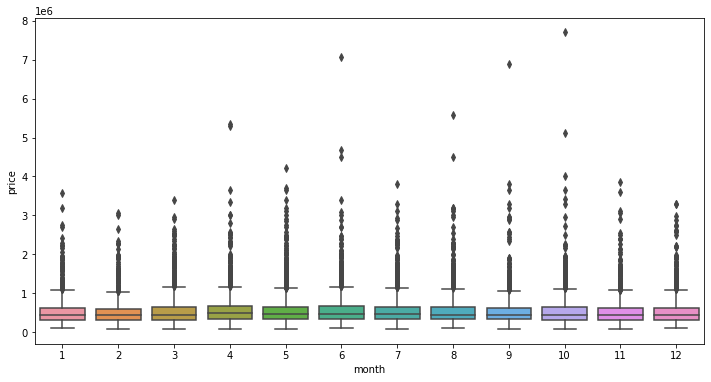

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=df);

In [89]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

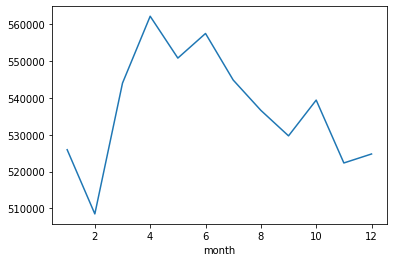

In [91]:
df.groupby('month').mean()['price'].plot();

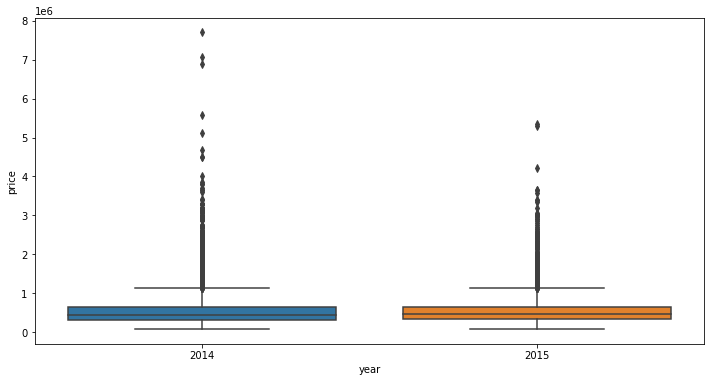

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='price', data=df);

In [93]:
df.groupby('year').mean()['price']

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

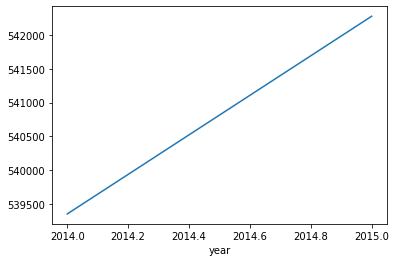

In [94]:
df.groupby('year').mean()['price'].plot();

Now as original date colum is no longer necessary, let's drop it.

In [96]:
df = df.drop('date', axis=1)

In [97]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


In [98]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

------

### Zip Code

In [99]:
df['zipcode'].dtype

dtype('int64')

 If we leave `zipcode` in original way, it might get treated as Continous variables by model. 
 To prevent from this, we will treat it as Categorical feature. 
 
 + we can ask Domain Expert and get the mapping for those zipcodes. Example: Zipcodes from Expensive ares, etc

In [101]:
df['zipcode'].nunique()

70

In [103]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

For our case, we will just ignore it for now.

In [104]:
df = df.drop('zipcode', axis=1)

----

### Year Renovated

For this feature, `0` means `No Renovated`. And it is not the Year.
So to avoid misintrepretation by the model, we can just categorize into `Renovation Done`: `0` or `1`

However, if we flip our thinking and use common sense, houses which are recently renovated are usually more expensive than Houses with No Renovation or renovated long time back. Therefore, existing year value is aligned with common sense. We decided to leave `yr_renovated` as it is. Higher year are more corelated with price and more valuable.

In [106]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [107]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64


---

### Sqtf Basement

In [108]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [109]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

---------

## Scaling and Train Test Split

In [189]:
X = df.drop('price', axis=1).values
y = df['price'].values

# returns numpy arrays

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [192]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15117, 19), (6480, 19), (15117,), (6480,))

### Scaling

We want to do Scaling post split, to avoid data leakage.

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaler = MinMaxScaler()

In [195]:
X_train = scaler.fit_transform(X_train)

In [196]:
X_test = scaler.transform(X_test)

## Creating a Model

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [200]:
X_train.shape

(15117, 19)

### Typically we base the number of neurons on number of features. In this case, 19 Incoming features.

In [201]:
model = Sequential()

In [202]:
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

## Training the Model

In [203]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 7ms/step - loss: 430242201600.0000 - val_loss: 418930819072.0000
Epoch 2/400
119/119 [==============================] - 1s 4ms/step - loss: 429292814336.0000 - val_loss: 415495389184.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 414357094400.0000 - val_loss: 380463382528.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 338008702976.0000 - val_loss: 256422248448.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 184750358528.0000 - val_loss: 114715598848.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 104048992256.0000 - val_loss: 95272804352.0000
Epoch 7/400
119/119 [==============================] - 1s 3ms/step - loss: 97677287424.0000 - val_loss: 93700939776.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96004997120.0000 - val_loss: 92165193728.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 38229164032.0000 - val_loss: 36959444992.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 38063714304.0000 - val_loss: 36816109568.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 37932494848.0000 - val_loss: 36649910272.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 37740355584.0000 - val_loss: 36523896832.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 37584990208.0000 - val_loss: 36357402624.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37397348352.0000 - val_loss: 36201807872.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37261729792.0000 - val_loss: 36025344000.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 37142892544.0000 - val_loss: 35838767104.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32954777600.0000 - val_loss: 31507105792.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32965767168.0000 - val_loss: 31473461248.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32888301568.0000 - val_loss: 31427893248.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32866838528.0000 - val_loss: 31360200704.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32828346368.0000 - val_loss: 31321833472.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32827762688.0000 - val_loss: 31335798784.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32753147904.0000 - val_loss: 31247532032.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32743200768.0000 - val_loss: 31200651264.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31533058048.0000 - val_loss: 29787662336.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31441311744.0000 - val_loss: 29696376832.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31371376640.0000 - val_loss: 29699405824.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31385812992.0000 - val_loss: 29666007040.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31360417792.0000 - val_loss: 29648318464.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31356370944.0000 - val_loss: 29624215552.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31350140928.0000 - val_loss: 29678921728.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31351035904.0000 - val_loss: 29639581696.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30529710080.0000 - val_loss: 28703229952.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30474520576.0000 - val_loss: 28665507840.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30484490240.0000 - val_loss: 28651397120.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30439004160.0000 - val_loss: 28610560000.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30442663936.0000 - val_loss: 28590028800.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30436071424.0000 - val_loss: 28569403392.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30417721344.0000 - val_loss: 28632426496.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30395420672.0000 - val_loss: 28537141248.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29762928640.0000 - val_loss: 27736987648.0000
Epoch 334/400
119/119 [==============================] - 0s 4ms/step - loss: 29788727296.0000 - val_loss: 27725828096.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 29698426880.0000 - val_loss: 27732408320.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29704400896.0000 - val_loss: 27710898176.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29692059648.0000 - val_loss: 27801571328.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29685477376.0000 - val_loss: 27712196608.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29684424704.0000 - val_loss: 27657281536.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29693667328.0000 - val_loss: 27710158848.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29075617792.0000 - val_loss: 26922868736.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29104812032.0000 - val_loss: 26843895808.0000


------

In [206]:
model.history.history

{'loss': [430242201600.0,
  429292814336.0,
  414357094400.0,
  338008702976.0,
  184750358528.0,
  104048992256.0,
  97677287424.0,
  96004997120.0,
  94303404032.0,
  92583731200.0,
  90825891840.0,
  89026191360.0,
  87121895424.0,
  85155069952.0,
  83134259200.0,
  81043226624.0,
  78851514368.0,
  76562685952.0,
  74206625792.0,
  71769677824.0,
  69295685632.0,
  66757472256.0,
  64286986240.0,
  61894955008.0,
  59665829888.0,
  57595203584.0,
  55768363008.0,
  54231797760.0,
  52956557312.0,
  51870408704.0,
  51012366336.0,
  50209206272.0,
  49523822592.0,
  48864907264.0,
  48294514688.0,
  47756767232.0,
  47272824832.0,
  46789103616.0,
  46362832896.0,
  45907656704.0,
  45500043264.0,
  45112274944.0,
  44726988800.0,
  44351180800.0,
  43991564288.0,
  43623657472.0,
  43318951936.0,
  42945667072.0,
  42667884544.0,
  42247491584.0,
  41970626560.0,
  41691185152.0,
  41407913984.0,
  41138642944.0,
  40842256384.0,
  40589438976.0,
  40357904384.0,
  40114331648.0,


In [207]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302422e+11,4.189308e+11
1,4.292928e+11,4.154954e+11
2,4.143571e+11,3.804634e+11
3,3.380087e+11,2.564222e+11
4,1.847504e+11,1.147156e+11
...,...,...
395,2.910108e+10,2.688191e+10
396,2.907036e+10,2.687067e+10
397,2.908143e+10,2.695227e+10
398,2.907562e+10,2.692287e+10


In [208]:
losses = pd.DataFrame(model.history.history)

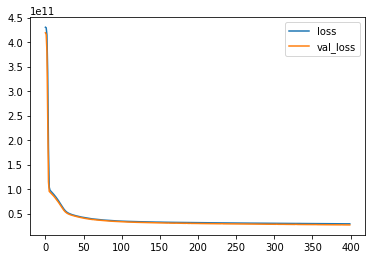

In [210]:
losses.plot();

It's a good sign that there is no spike in `val_loss` which can indicates `Overfitting`. And good to see that both `loss` and `val_loss` are getting lower.

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [211]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [212]:
predictions = model.predict(X_test)

In [215]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [216]:
mae, mse, rmse

(101080.232480951, 26843894025.297916, 163841.06330617462)

Average price of an house is as below. so compared to mae, our model is off about 19%.

In [223]:
df['price'].mean()

540296.5735055795

In [227]:
df['price'].median()

450000.0

In [224]:
(101080.232480951/ 540296.5735055795) *100

18.70828678870146

In [222]:
explained_variance_score(y_test, predictions)

0.7976295258497766

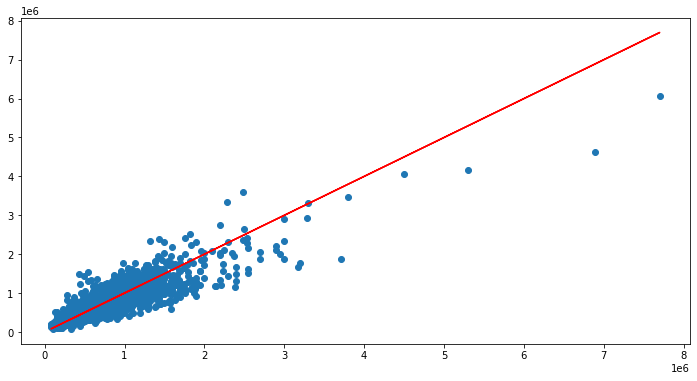

In [232]:
plt.figure(figsize=(12,6))

# Our predictions
plt.scatter(x=y_test, y=predictions);

# Perfect predictions
plt.plot(y_test, y_test, color='red')

In [233]:
y_test.shape

(6480,)

In [243]:
y_test

array([ 319000.,  464625.,  489950., ...,  422500.,  435000., 1230000.])

In [245]:
y_test.reshape(6480, 1)

array([[ 319000.],
       [ 464625.],
       [ 489950.],
       ...,
       [ 422500.],
       [ 435000.],
       [1230000.]])

In [236]:
errors = y_test.reshape(6480, 1) - predictions

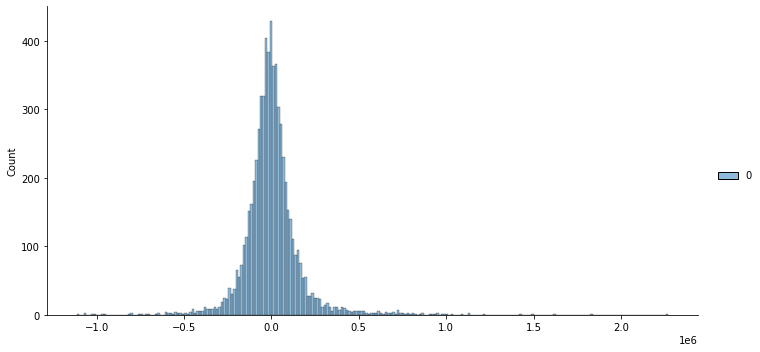

In [239]:
sns.displot(data=errors, aspect=2);

----------

-------------
### Predicting on a brand new house

In [253]:
single_house = df.drop('price', axis=1).iloc[0]

In [254]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [255]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [256]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [259]:
predictions = model.predict(single_house)
predictions

array([[278217.1]], dtype=float32)

Now compare with the actual value.

In [260]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

In [263]:
predictions - df.iloc[0]['price']

array([[56317.094]], dtype=float32)

We are off about 56317$ from the actual price. 